# Multiple Linear Regression

It also follows the same steps as in Simple Linear Regression.

### Import libraries

In [86]:
#1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

### Load dataset

In [33]:
#2. Load dataset
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### Explore the data

In [34]:
df.shape

(24, 6)

In [35]:
list(df.columns)

['Unnamed: 0',
 'year',
 'month',
 'interest_rate',
 'unemployment_rate',
 'index_price']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


### Data Preprocessing

In [38]:
#clean dataset by dropping unnecessary cols
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [39]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [40]:
df.shape

(24, 3)

In [41]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [44]:
# Handle missing values and duplicates if any
df.isnull().sum()
# df.dropna(inplace = True)

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [45]:
df.duplicated().sum()
#df.drop_duplicates(inplace = True)

np.int64(0)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [47]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


### Visualize data

In [48]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Figure size 640x480 with 0 Axes>

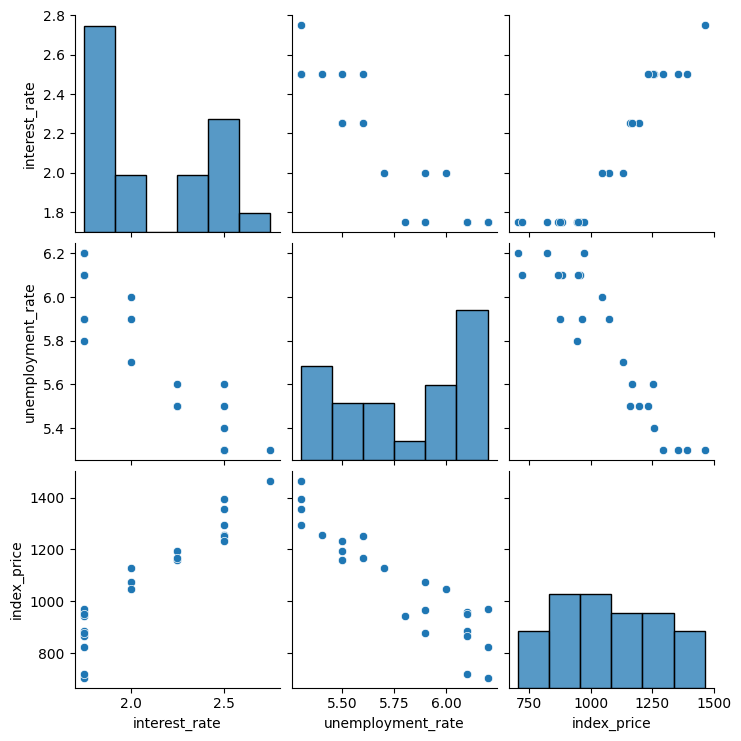

In [71]:
plt.figure(dpi=100)
sns.pairplot(df)
# plt.show()

<Axes: xlabel='interest_rate', ylabel='index_price'>

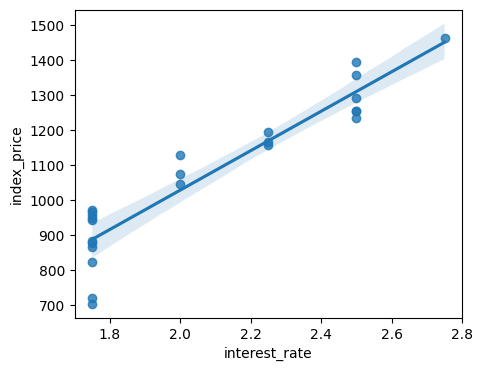

In [58]:
plt.figure(figsize=(5,4))
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

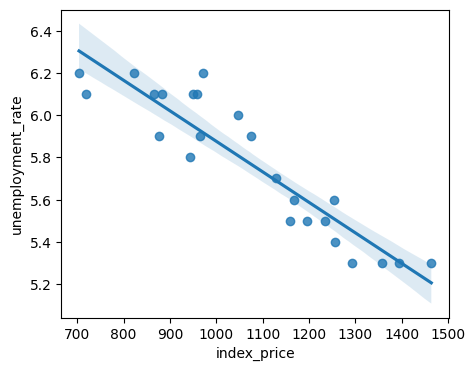

In [62]:
plt.figure(figsize=(5,4))
sns.regplot(x='index_price',y='unemployment_rate',data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

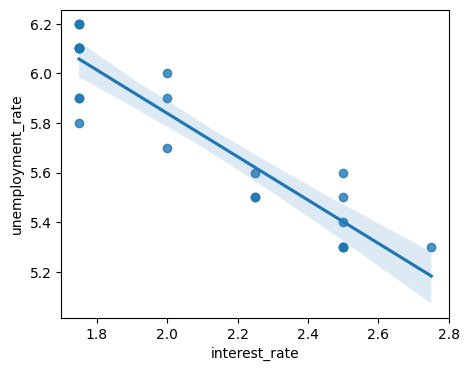

In [63]:
plt.figure(figsize=(5,4))
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

### Split the dataset

In [ ]:
#label X & Y
X=df.iloc[:,:-1] #select all rows and all columns except last column
y=df.iloc[:,-1]  #select all rows and only last column

In [74]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [75]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Standardize data

In [77]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [80]:
X_train_scaled

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

### Train the Model

In [85]:
model=LinearRegression(n_jobs=-1)
model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [87]:
#cross validation
validation_score=cross_val_score(model,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=3)

In [88]:
np.mean(validation_score)

np.float64(-5914.828180162388)

### Prediction

In [90]:
y_pred=model.predict(X_test_scaled)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

### Evaluate the model

In [99]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("mse: ",mse)
print("rmse: ",rmse)

mse:  5793.762887712569
rmse:  76.11677139574805


In [100]:
score=r2_score(y_test,y_pred)
print("R2 score: ",score)

R2 score:  0.8278978091457145


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:
R2: The R2 of the model
n: The number of observations 
k: The number of predictor variables

In [102]:
adjusted_r2= 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print("Adjusted R2: ",adjusted_r2)

Adjusted R2:  0.7131630152428576


### Predict for new data

In [104]:
new_data=scaler.transform([[2.8,5.5]])
print(model.predict(new_data))

[1347.41310414]


c:\Users\285128\OneDrive - UST\Upskill\Datascience\ML\ML_Practice\pvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Assumptions 

visualizing results in Multiple Linear Regression (MLR) is a bit different from Simple Linear Regression, because you have multiple features, so you can’t just plot a single straight line easily.

We make assumptions to check how good the predictions are